In [1]:
#Import neccessary library.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Import the cleaned London dataset.

london=pd.read_csv('all_london.csv')
london

,year,Location,Day,Date,Weather,Time,Period,Direction,total_cycles,region,Site ID,Borough,Functional area for monitoring,Road type,Is it on the strategic CIO panel?,Easting (UK Grid),Northing (UK Grid),Latitude,Longitude
0,2015,Grove Road,wed,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
1,2015,Grove Road,wed,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,inner,OUTCY196,Merton,Outer,Minor Road,1.0,528490.5540,169294.7891,51.408123,-0.153983
2,2015,Grove Road,wed,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
3,2015,Grove Road,wed,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.0,inner,OUTCY196,Merton,Outer,Minor Road,1.0,528490.5540,169294.7891,51.408123,-0.153983
4,2015,Grove Road,wed,2015-05-20,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391500,2021,Lambeth Road,tue,2021-05-25,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,8.0,central,CENCY205,Southwark,Central,A Road,1.0,531612.8500,179403.0900,51.498253,-0.105364
1391501,2021,Lambeth Road,tue,2021-05-25,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,8.0,central,CSHCY119,Southwark,Central,A Road,0.0,531612.8500,179403.0900,51.498253,-0.105364
1391502,2021,Lambeth Road,tue,2021-05-25,Dry,2145 - 2200,Evening (19:00-22:00),Westbound,5.0,central,CENCY024,Lambeth,Central,A Road,1.0,530991.2400,179111.5900,51.495773,-0.114414
1391503,2021,Lambeth Road,tue,2021-05-25,Dry,2145 - 2200,Evening (19:00-22:00),Westbound,5.0,central,CENCY205,Southwark,Central,A Road,1.0,531612.8500,179403.0900,51.498253,-0.105364


In [3]:
#Create object and sense check the cycling count data set of 2021.

london2021=london[london['year'] == 2021]
london2021

,year,Location,Day,Date,Weather,Time,Period,Direction,total_cycles,region,Site ID,Borough,Functional area for monitoring,Road type,Is it on the strategic CIO panel?,Easting (UK Grid),Northing (UK Grid),Latitude,Longitude
514040,2021,Grove Road,wed,2021-05-19,Wet,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
514041,2021,Grove Road,wed,2021-05-19,Wet,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,inner,OUTCY196,Merton,Outer,Minor Road,1.0,528490.5540,169294.7891,51.408123,-0.153983
514042,2021,Grove Road,wed,2021-05-19,Wet,0615 - 0630,Early Morning (06:00-07:00),Northbound,1.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
514043,2021,Grove Road,wed,2021-05-19,Wet,0615 - 0630,Early Morning (06:00-07:00),Northbound,1.0,inner,OUTCY196,Merton,Outer,Minor Road,1.0,528490.5540,169294.7891,51.408123,-0.153983
514044,2021,Grove Road,wed,2021-05-19,Wet,0630 - 0645,Early Morning (06:00-07:00),Northbound,7.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391500,2021,Lambeth Road,tue,2021-05-25,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,8.0,central,CENCY205,Southwark,Central,A Road,1.0,531612.8500,179403.0900,51.498253,-0.105364
1391501,2021,Lambeth Road,tue,2021-05-25,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,8.0,central,CSHCY119,Southwark,Central,A Road,0.0,531612.8500,179403.0900,51.498253,-0.105364
1391502,2021,Lambeth Road,tue,2021-05-25,Dry,2145 - 2200,Evening (19:00-22:00),Westbound,5.0,central,CENCY024,Lambeth,Central,A Road,1.0,530991.2400,179111.5900,51.495773,-0.114414
1391503,2021,Lambeth Road,tue,2021-05-25,Dry,2145 - 2200,Evening (19:00-22:00),Westbound,5.0,central,CENCY205,Southwark,Central,A Road,1.0,531612.8500,179403.0900,51.498253,-0.105364


In [4]:
#Choose only the neccessary columns.

london2021=london2021[['Borough','total_cycles']]

In [5]:
#Aggregate the total number of cycles count group by borough.

london2021=london2021.groupby(london2021['Borough']).sum(['total_cycles'])

In [6]:
#Sense check the 2021 london total cycles data set.

london2021

,total_cycles
Borough,
Barking & Dagenham,2508.0
Barnet,9033.0
Bexley,3315.0
Brent,11098.0
Bromley,4580.0
Camden,132037.0
City of London,165666.0
Croydon,6138.0
Ealing,17925.0


In [7]:
#Create object cycling count data set of London 2016.

london2016=london[london['year'] == 2016]

In [8]:
#Choose only the neccessary columns and sense check the London 2016.

london2016=london2016[['Borough','total_cycles']]
london2016=london2016.groupby(london2016['Borough']).sum(['total_cycles'])
london2016

,total_cycles
Borough,
Barking & Dagenham,1987.0
Barnet,8128.0
Bexley,3408.0
Brent,8048.0
Bromley,2630.0
Camden,149941.0
City of London,167225.0
Croydon,10317.0
Ealing,17044.0


In [9]:
#Create object cycling count data set of London 2019 and sense chheck the data set.

london2019=london[london['year'] == 2019]
london2019=london2019[['Borough','total_cycles']]
london2019=london2019.groupby(london2019['Borough']).sum(['total_cycles'])
london2019

,total_cycles
Borough,
Barking & Dagenham,1111.0
Barnet,6941.0
Bexley,3171.0
Brent,7920.0
Bromley,3533.0
Camden,153181.0
City of London,207024.0
Croydon,8259.0
Ealing,14859.0


In [10]:
#import the csv file summarised neccessary infrastructure data transformed from json and pivoted and merged by excel.

london_infra_cycle=pd.read_csv('london_infra_cycle2.csv')
london_infra_cycle

,Borough,parking,advanced_stop_line,total_infra,total_cycles
0,Barking & Dagenham,265,76,341,1111
1,Barnet,410,6,416,6941
2,Bexley,179,6,185,3171
3,Brent,489,92,581,7920
4,Bromley,299,51,350,3533
5,Camden,1622,259,1881,153181
6,City of London,306,122,428,207024
7,Croydon,414,122,536,8259
8,Ealing,980,157,1137,14859
9,Enfield,355,38,393,7226


## Parking VS Total cycles count 2019

In [11]:
#Create independent variable object.
x_park=london_infra_cycle['parking']

#Create dependent variable object.
y=london_infra_cycle['total_cycles']

#Create formula and pass through OLS methods and print the regression table.
f='y~x_park'
parking_cycle_model=ols(f,data=london_infra_cycle).fit()
parking_cycle_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     21.77
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.58e-05
Time:                        17:47:28   Log-Likelihood:                -404.28
No. Observations:                  33   AIC:                             812.6
Df Residuals:                      31   BIC:                             815.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1.54e+04     -0.665      0.511   -4.17e+04    2.12e+04
x_park        80.6518     17.285      4.666      0.000      45.398     115.905
==============================================================================
Omnibus:                       27.496   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.028
Skew:                           1.943   Prob(JB):                     6.82e-13
Kurtosis:                       8.065   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Extract the estimated parameters.
print("Parameters: ",parking_cycle_model.params)

# Extract the standard errors.
print("Standard errors: ", parking_cycle_model.bse)  

# Extract the predicted values.
print("Predicted values: ", parking_cycle_model.predict())

Parameters:  Intercept   -10253.236317
x_park          80.651772
dtype: float64
Standard errors:  Intercept    15411.084495
x_park          17.285293
dtype: float64
Predicted values:  [ 11119.48325533  22813.99019087   4183.43086598  29185.48017644
  13861.64350229 120563.93781757  14426.20590607  23136.59727875
  68785.50021333  18378.14273256  18216.83918863 174600.62503695
 110724.42163733  39750.86230441  13780.99173032  11926.00097503
  13458.38464244  45799.7452021   90238.87155714  87254.75599428
  18539.4462765  104998.14582751  28701.56954462  29911.34612416
  34669.80067035   2893.00251447  31040.47093173 111611.59112899
  14506.85767804  58381.4216293   40315.42470819  50961.45860813
 119031.55415016]


In [13]:
# Create the linear regression model.
# Set the coefficient and the constant using the extimated parameters.
y_pred=(-10253.236317)+80.651772*x_park

# View the output.
y_pred

0      11119.483263
1      22813.990203
2       4183.430871
3      29185.480191
4      13861.643511
5     120563.937867
6      14426.205915
7      23136.597291
8      68785.500243
9      18378.142743
10     18216.839199
11    174600.625107
12    110724.421683
13     39750.862323
14     13780.991739
15     11926.000983
16     13458.384651
17     45799.745223
18     90238.871595
19     87254.756031
20     18539.446287
21    104998.145871
22     28701.569559
23     29911.346139
24     34669.800687
25      2893.002519
26     31040.470947
27    111611.591175
28     14506.857687
29     58381.421655
30     40315.424727
31     50961.458631
32    119031.554199
Name: parking, dtype: float64

Text(0, 0.5, 'number of cyclists')

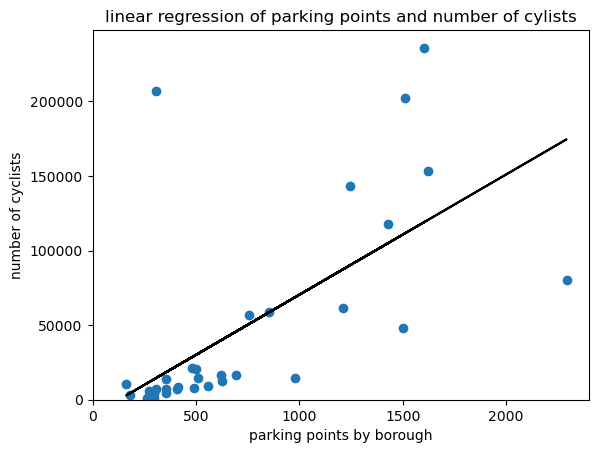

In [14]:
# Plot the graph with a scatterplot and a regression line.
plt.scatter(x_park,y)
plt.plot(x_park,y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('linear regression of parking points and number of cylists')
plt.xlabel('parking points by borough')
plt.ylabel('number of cyclists')

## Advanced Stop Line VS Total cycles count 2019

In [15]:
#Create independent variable object.
x_stop=london_infra_cycle['advanced_stop_line']

#Create dependent variable object.
y=london_infra_cycle['total_cycles']

#Create formula and pass through OLS methods and print the regression table.
f='y~x_stop'
advanced_stop_line_model=ols(f,data=london_infra_cycle).fit()
advanced_stop_line_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     30.72
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           4.53e-06
Time:                        17:47:28   Log-Likelihood:                -401.70
No. Observations:                  33   AIC:                             807.4
Df Residuals:                      31   BIC:                             810.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.071e+04   1.49e+04     -1.385      0.176   -5.12e+04    9782.170
x_stop       599.1222    108.094      5.543      0.000     378.664     819.580
==============================================================================
Omnibus:                       16.511   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.648
Skew:                           1.418   Prob(JB):                     5.41e-05
Kurtosis:                       5.500   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Extract the estimated parameters.
print("Parameters: ",advanced_stop_line_model.params)

# Extract the standard errors.
print("Standard errors: ", advanced_stop_line_model.bse)  

# Extract the predicted values.
print("Predicted values: ", advanced_stop_line_model.predict())

Parameters:  Intercept   -20706.639210
x_stop         599.122176
dtype: float64
Standard errors:  Intercept    14949.059941
x_stop         108.093541
dtype: float64
Predicted values:  [ 24826.64620029 -17111.90615149 -17111.90615149  34412.60102355
   9848.59178894 134466.00449134  52386.26631716  52386.26631716
  73355.54249305   2060.00349504  46395.04455262  91928.32996312
  27822.25708255  30218.74578837   4456.49220085   7452.10308312
  13443.32484766  38606.45625872  78148.51990468  32615.23449419
  20033.66878865 180598.41207829  54782.75502298  35610.84537645
  66765.19855206   8051.22525958  26024.89055319 143452.83713815
  -2732.97391659  39205.57843518  52985.38849362 115893.21702127
 116492.33919773]


In [17]:
# Create the linear regression model.
# Set the coefficient and the constant using the extimated parameters.
y_pred=(-20706.639210)+599.122176*x_stop

# View the output.
y_pred

0      24826.646166
1     -17111.906154
2     -17111.906154
3      34412.600982
4       9848.591766
5     134466.004374
6      52386.266262
7      52386.266262
8      73355.542422
9       2060.003478
10     46395.044502
11     91928.329878
12     27822.257046
13     30218.745750
14      4456.492182
15      7452.103062
16     13443.324822
17     38606.456214
18     78148.519830
19     32615.234454
20     20033.668758
21    180598.411926
22     54782.754966
23     35610.845334
24     66765.198486
25      8051.225238
26     26024.890518
27    143452.837014
28     -2732.973930
29     39205.578390
30     52985.388438
31    115893.216918
32    116492.339094
Name: advanced_stop_line, dtype: float64

Text(0, 0.5, 'number of cyclists')

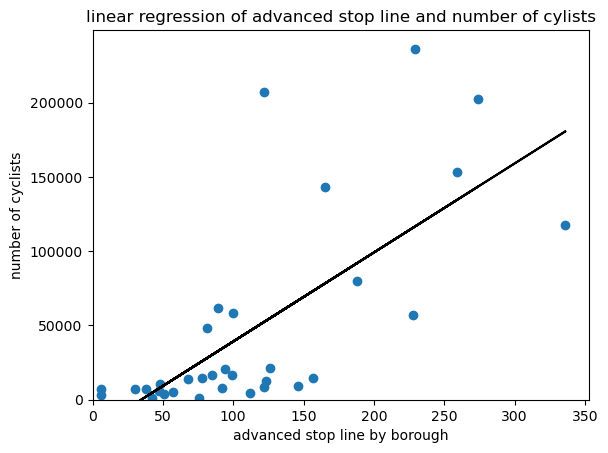

In [18]:
# Plot the data points with a scatterplot with a regression line.
plt.scatter(x_stop,y)
plt.plot(x_stop,y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('linear regression of advanced stop line and number of cylists')
plt.xlabel('advanced stop line by borough')
plt.ylabel('number of cyclists')

## Total infrastructure built from 2017 to 2019 VS Total cycles count 2019

In [19]:
#Create independent variable object.
x_total=london_infra_cycle['total_infra']

#Create dependent variable object.
y=london_infra_cycle['total_cycles']

#Create formula and pass through OLS methods and print the regression table.
f='y~x_total'
total_infra_model=ols(f,data=london_infra_cycle).fit()
total_infra_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     25.46
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.88e-05
Time:                        17:47:29   Log-Likelihood:                -403.16
No. Observations:                  33   AIC:                             810.3
Df Residuals:                      31   BIC:                             813.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.547e+04   1.53e+04     -1.010      0.320   -4.67e+04    1.58e+04
x_total       75.8436     15.030      5.046      0.000      45.189     106.498
==============================================================================
Omnibus:                       28.971   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.176
Skew:                           2.004   Prob(JB):                     1.16e-14
Kurtosis:                       8.533   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Extract the estimated parameters.
print("Parameters: ",total_infra_model.params)

# Extract the standard errors.
print("Standard errors: ", total_infra_model.bse)  

# Extract the predicted values.
print("Predicted values: ", total_infra_model.predict())

Parameters:  Intercept   -15465.399741
x_total         75.843607
dtype: float64
Standard errors:  Intercept    15312.738431
x_total         15.030174
dtype: float64
Predicted values:  [ 10397.27028951  16085.54082416  -1434.33242254  28599.73600037
  11079.86275367 127196.42526751  16995.6641097   25186.77367959
  70768.78156386  14341.1378602   19801.87757346 172626.74593753
 104443.34312894  38004.34328431  10321.42668239   8956.24175407
  11155.7063608   44754.42431876  91549.92991709  82979.60231156
  16768.13328831 118398.5668406   30723.35699997  29434.01567879
  37852.65607006    537.6013628   29282.32846453 119915.43898317
  10093.895861    56661.87063794  41417.3056051   59392.24049457
 123480.08851821]


In [21]:
# Create the linear regression model.
# Set the coefficient and the constant using the extimated parameters.
y_pred=(-15465.399741)+75.843607*x_total

# View the output.
y_pred

0      10397.270246
1      16085.540771
2      -1434.332446
3      28599.735926
4      11079.862709
5     127196.425026
6      16995.664055
7      25186.773611
8      70768.781418
9      14341.137810
10     19801.877514
11    172626.745619
12    104443.342926
13     38004.343194
14     10321.426639
15      8956.241713
16     11155.706316
17     44754.424217
18     91549.929736
19     82979.602145
20     16768.133234
21    118398.566614
22     30723.356922
23     29434.015603
24     37852.655980
25       537.601336
26     29282.328389
27    119915.438754
28     10093.895818
29     56661.870516
30     41417.305509
31     59392.240368
32    123480.088283
Name: total_infra, dtype: float64

Text(0, 0.5, 'number of cyclists')

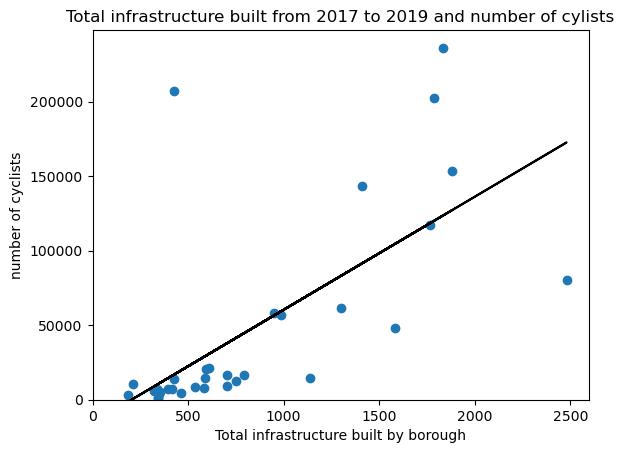

In [22]:
# Plot the data points with a scatterplot with a regression line.
plt.scatter(x_total,y)
plt.plot(x_total,y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('Total infrastructure built from 2017 to 2019 and number of cylists')
plt.xlabel('Total infrastructure built by borough')
plt.ylabel('number of cyclists')

## Multivariate Llinear Regression

In [23]:
#Define the 2 independent variables.
X = london_infra_cycle [['parking','advanced_stop_line',]] 

#Define the dependent variables.
y = london_infra_cycle['total_cycles']

In [24]:
#Sense check the data frame.
X

,parking,advanced_stop_line
0,265,76
1,410,6
2,179,6
3,489,92
4,299,51
5,1622,259
6,306,122
7,414,122
8,980,157
9,355,38


In [25]:
#Create formula, pass through OLS methods and print the regression table.
f='y~X'
MLS=ols(f,data=london_infra_cycle).fit()
MLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     17.19
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.06e-05
Time:                        17:47:29   Log-Likelihood:                -400.46
No. Observations:                  33   AIC:                             806.9
Df Residuals:                      30   BIC:                             811.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.624e+04   1.51e+04     -1.740      0.092    -5.7e+04    4556.853
X[0]          34.6696     22.704      1.527      0.137     -11.698      81.038
X[1]         429.2571    153.549      2.796      0.009     115.669     742.845
==============================================================================
Omnibus:                       26.378   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.645
Skew:                           1.913   Prob(JB):                     1.66e-11
Kurtosis:                       7.634   Cond. No.                     1.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Extract the estimated parameters.
print("Parameters: ",MLS.params)

# Extract the standard errors.
print("Standard errors: ", MLS.bse)  

# Extract the predicted values.
print("Predicted values: ", MLS.predict())

Parameters:  Intercept   -26240.262203
X[0]            34.669599
X[1]           429.257104
dtype: float64
Standard errors:  Intercept    15079.826853
X[0]            22.704103
X[1]           153.548642
dtype: float64
Predicted values:  [ 1.55707215e+04 -9.45018384e+03 -1.74588613e+04  3.02048255e+04
  6.01806032e+03  1.41171418e+05  3.67380019e+04  4.04823186e+04
  7.51293105e+04  2.37921553e+03  3.40749020e+04  1.33922795e+05
  6.05339623e+04  3.17417433e+04  2.12007678e+03  3.46896152e+03
  8.42025495e+03  4.03515627e+04  8.77854808e+04  5.38791657e+04
  1.53262679e+04  1.67532982e+05  4.45915494e+04  3.13753661e+04
  5.57422418e+04  1.52234929e+01  2.49926268e+04  1.43761949e+05
 -2.71898207e+03  4.61892773e+04  4.82962004e+04  9.79445835e+04
  1.27634982e+05]


In [28]:
# Create the linear regression model.
# Set the coefficient and the constant using the extimated parameters.
y_pred=(-26240.262203)+34.669599*X['parking']+429.257104*X['advanced_stop_line']

# View the output.
y_pred

0      15570.721436
1      -9450.183989
2     -17458.861358
3      30204.825276
4       6018.060202
5     141171.417311
6      36738.001779
7      40482.318471
8      75129.310145
9       2379.215394
10     34074.901892
11    133922.794257
12     60533.961721
13     31741.743017
14      2120.076667
15      3468.961410
16      8420.254831
17     40351.562398
18     87785.480311
19     53879.165244
20     15326.267712
21    167532.981712
22     44591.549218
23     31375.365875
24     55742.241624
25        15.223426
26     24992.626597
27    143761.948382
28     -2718.982190
29     46189.276946
30     48296.200162
31     97944.583150
32    127634.981810
dtype: float64

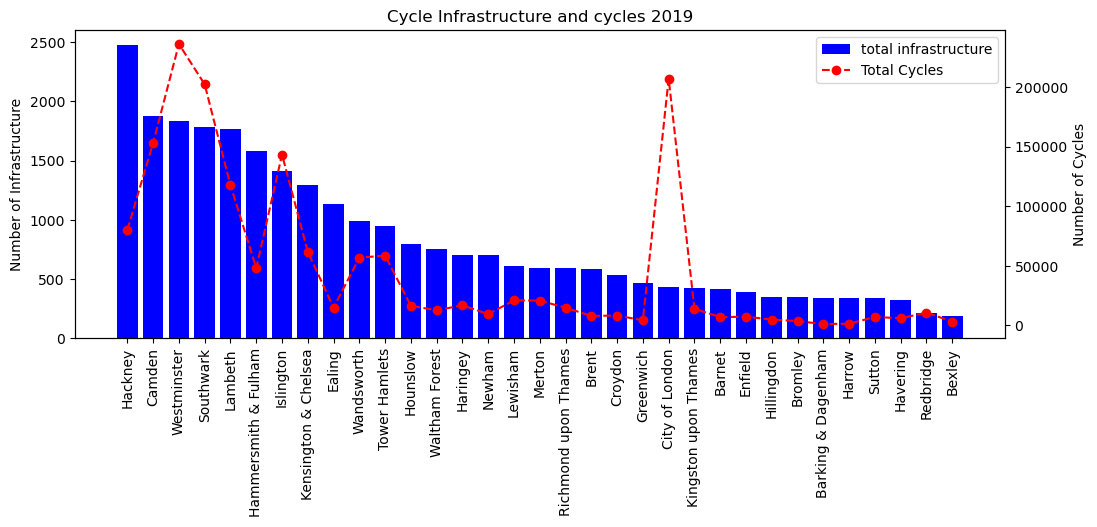

In [32]:
#Create intuitive visualisation of relationship between number of infrastructure and cycles
sorted_data = london_infra_cycle.sort_values(by='total_infra', ascending=False)

fig, ax1 = plt.subplots(figsize=(12,4))

ax1.bar(sorted_data['Borough'],sorted_data['total_infra'], label='total infrastructure', color='blue')
ax1.set_ylabel('Number of Infrastructure')
ax1.tick_params(axis='y')

ax2=ax1.twinx()

ax2.plot(sorted_data['Borough'],sorted_data['total_cycles'],marker='o',color='red',linestyle='--',label='Total Cycles')
ax2.set_ylabel('Number of Cycles')
ax2.tick_params(axis='y')

plt.title('Cycle Infrastructure and cycles 2019')
plt.xlabel('Borough')

plt.setp(ax1.get_xticklabels(), rotation=90)
plt.setp(ax2.get_xticklabels(), rotation=90)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show()